In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("car-sales-extended-missing-data.csv")
df

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [5]:
df.head(7)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0


In [20]:
# Impute missing values with the mean of the respective column
df['Odometer (KM)'].fillna(df['Odometer (KM)'].mean(), inplace=True)

# Impute missing values using KNN imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[['Odometer (KM)', 'Price']] = imputer.fit_transform(df[['Odometer (KM)', 'Price']])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           1000 non-null   int32  
 1   Colour         1000 non-null   int32  
 2   Odometer (KM)  1000 non-null   float64
 3   Doors          1000 non-null   float64
 4   Price          1000 non-null   float64
dtypes: float64(3), int32(2)
memory usage: 31.4 KB


In [22]:
df.fillna(method="backfill",inplace=True)
##values after the missing value and fill the empty spot with the first non-missing value it finds and changes directly to the dataframe

In [23]:
df

,Make,Colour,Odometer (KM),Doors,Price
0,1,4,35431.0,4.0,15323.0
1,0,1,192714.0,5.0,19943.0
2,1,4,84714.0,4.0,28343.0
3,3,4,154365.0,4.0,13434.0
4,2,1,181577.0,3.0,14043.0
...,...,...,...,...,...
995,3,0,35820.0,4.0,32042.0
996,2,4,155144.0,3.0,5716.0
997,2,1,66604.0,4.0,31570.0
998,1,4,215883.0,4.0,4001.0


In [24]:
df.isnull().sum() # gives columns with amounts of missing data

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Normalize 'Odometer (KM)' and 'Price'
scaler = MinMaxScaler()
df[['Odometer (KM)', 'Price']] = scaler.fit_transform(df[['Odometer (KM)', 'Price']])

In [28]:
# Create a new feature for car age based on odometer and average annual mileage
df['Age'] = (df['Odometer (KM)'] / 15000).round()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split data into features and target variable
X = df[['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Age']]
y = df['Price']

# Encode categorical features
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.02687190528061977


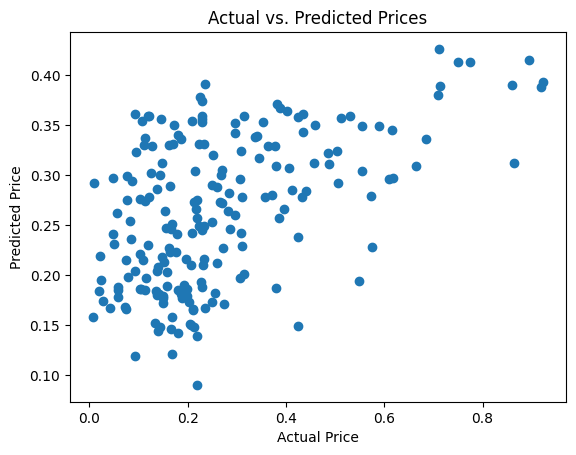

In [30]:
import matplotlib.pyplot as plt

# Plot predicted vs. actual prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices")
plt.show()

In [31]:
from sklearn.model_selection import cross_val_score

# Calculate cross-validation scores
scores = cross_val_score(model, X, y, cv=5)

# Print average and standard deviation of scores
print("Cross-validation scores:", scores)
print("Average score:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.13656592 0.16908348 0.20142561 0.13720619 0.22210032]
Average score: 0.17327630404207234
Standard deviation: 0.03418319111418136


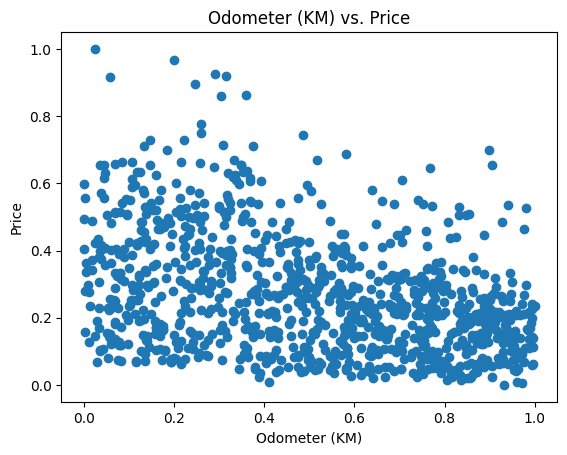

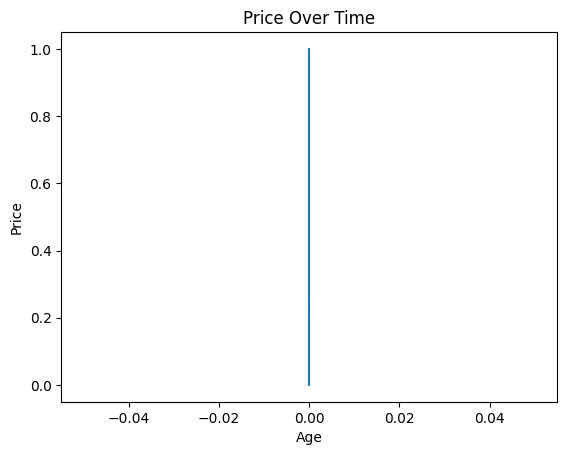

In [32]:
# Scatter plot of 'Odometer (KM)' vs. 'Price'
plt.scatter(df['Odometer (KM)'], df['Price'])
plt.xlabel('Odometer (KM)')
plt.ylabel('Price')
plt.title('Odometer (KM) vs. Price')
plt.show()

# Line plot of 'Price' over time (assuming 'Age' represents time)
plt.plot(df['Age'], df['Price'])
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Price Over Time')
plt.show()

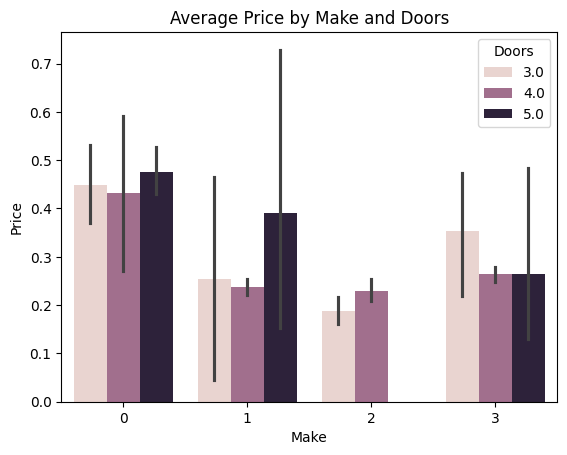

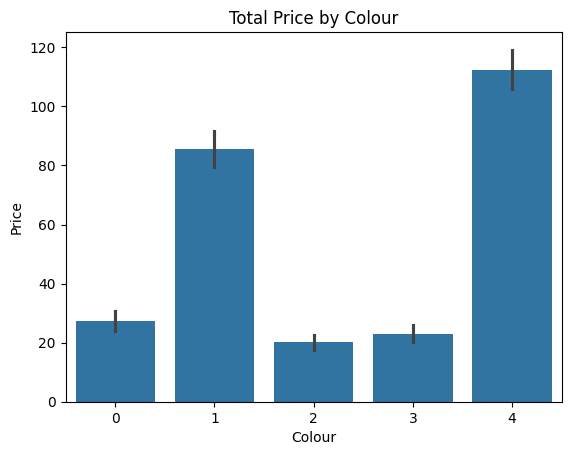

In [34]:
import seaborn as sns
# Grouped bar plot of 'Price' by 'Make'
sns.barplot(x='Make', y='Price', data=df, hue='Doors')
plt.title('Average Price by Make and Doors')
plt.show()

# Stacked bar plot of 'Price' by 'Colour'
sns.barplot(x='Colour', y='Price', data=df, estimator=sum)
plt.title('Total Price by Colour')
plt.show()